<a href="https://colab.research.google.com/github/mateuspalacio/grupo_four_jupyter/blob/main/AV3GerImpSis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
from google.colab import drive
from math import sqrt
from datetime import date, timedelta
import tensorflow as tf
import os
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [171]:
path = os.path.join('drive/My Drive/vgsales.csv')
df_data = pd.read_csv(path)


nan_value = float("NaN")


df_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [172]:
df_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [173]:
df_data = df_data[df_data['Global_Sales'] > 0.03]
df_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
14093,14095,Castlevania Bloodlines,GEN,1994.0,Platform,Konami Digital Entertainment,0.00,0.00,0.04,0.00,0.04
14094,14096,Hakuouki: Zuisouroku DS,DS,2011.0,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
14095,14097,Might & Magic X: Legacy,PC,2014.0,Role-Playing,Ubisoft,0.00,0.03,0.00,0.00,0.04
14096,14098,Detective Conan: Prelude from the Past,PSP,2012.0,Action,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04


In [174]:
for index in df_data.index:
    if df_data.loc[index,'Name']=='FIFA Soccer 13':
        df_data.loc[index,'Genre'] = 'Sports'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [175]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14098 entries, 0 to 14097
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          14098 non-null  int64  
 1   Name          14098 non-null  object 
 2   Platform      14098 non-null  object 
 3   Year          13876 non-null  float64
 4   Genre         14098 non-null  object 
 5   Publisher     14058 non-null  object 
 6   NA_Sales      14098 non-null  float64
 7   EU_Sales      14098 non-null  float64
 8   JP_Sales      14098 non-null  float64
 9   Other_Sales   14098 non-null  float64
 10  Global_Sales  14098 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.8+ MB


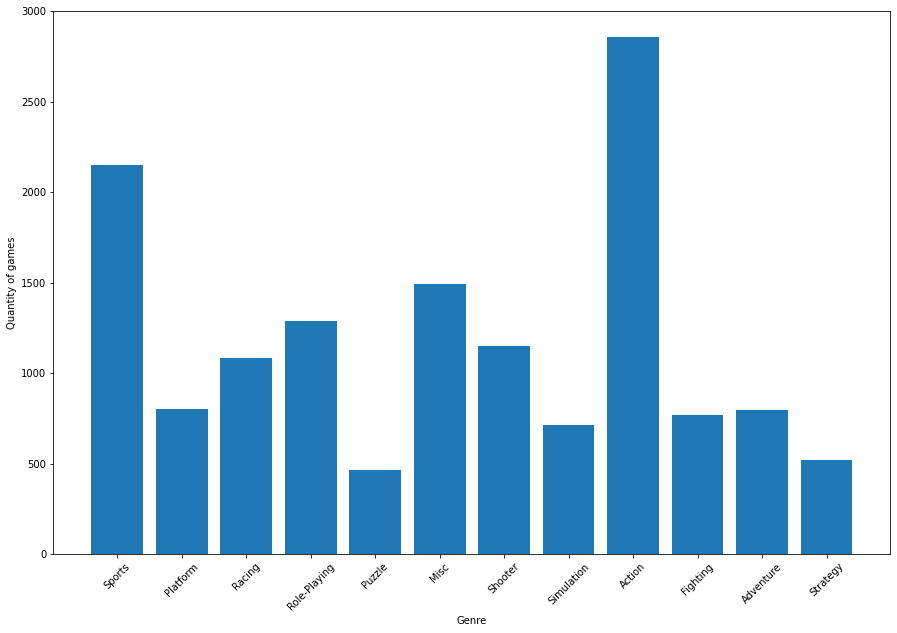

In [176]:
acc = {}
for x in df_data['Genre']:
    if x in acc:
        acc[x] = acc[x] + 1
    else:
        acc[x] = 1
x = acc.keys()
y = acc.values()
fig=plt.figure(figsize=(15,10))
plt.bar(range(len(acc)), list(acc.values()), align='center')
plt.xticks(range(len(acc)), list(acc.keys()))
plt.xticks(rotation=45)
# colocar labels plt.xlabel()
plt.xlabel("Genre")
plt.ylabel("Quantity of games")
plt.show()

## Dividindo os datasets por gênero

In [177]:
df_data_c0=df_data[df_data['Genre']=='Action']
df_data_c1=df_data[df_data['Genre']=='Sports']
df_data_c2=df_data[df_data['Genre']=='Role-Playing']
df_data_c3=df_data[df_data['Genre']=='Racing']
df_data_c4=df_data[df_data['Genre']=='Misc']
df_data_c5=df_data[df_data['Genre']=='Adventure']


In [178]:
df_data_gta=df_data_c0[df_data_c0['Name'] == 'Grand Theft Auto V']
df_gta_features = df_data_gta.drop(columns=['Rank', 'Name', 'Genre', 'Publisher'])

df_gta_features

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS3,2013.0,7.01,9.27,0.97,4.14,21.40
23,X360,2013.0,9.63,5.31,0.06,1.38,16.38
44,PS4,2014.0,3.80,5.81,0.36,2.02,11.98
197,XOne,2014.0,2.66,2.01,0.00,0.41,5.08
1896,PC,2015.0,0.36,0.64,0.00,0.08,1.08


### Porcentagem de vendas globais por plataforma para GTA V

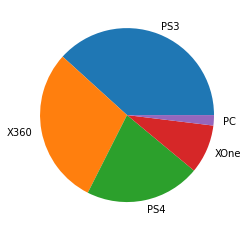

In [179]:
acc_plat_gta = {}

for x in df_data_gta['Global_Sales']:
    if x in acc_plat_gta:
        acc_plat_gta[x] = acc_plat_gta[x] + 1
    else:
        acc_plat_gta[x] = 1
Total = df_data_gta['Global_Sales'].sum()
plt.pie([x/Total for x in acc_plat_gta.keys()],labels=df_data_gta['Platform'])
plt.show()

### Vendas por plataforma por continente para GTA V.

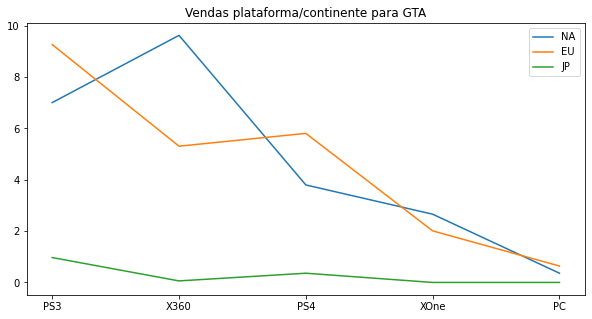

In [180]:
x = df_gta_features['Platform']
y = df_gta_features['NA_Sales']
z = df_gta_features['EU_Sales']
k = df_gta_features['JP_Sales']
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, k)
plt.title('Vendas plataforma/continente para GTA')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

## Vendas para cada continente

### Vendas na América do Norte

In [181]:
df_data_na=df_data.drop(columns=['Rank',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

df_data_na

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27
...,...,...,...,...,...,...
14093,Castlevania Bloodlines,GEN,1994.0,Platform,Konami Digital Entertainment,0.00
14094,Hakuouki: Zuisouroku DS,DS,2011.0,Adventure,Idea Factory,0.00
14095,Might & Magic X: Legacy,PC,2014.0,Role-Playing,Ubisoft,0.00
14096,Detective Conan: Prelude from the Past,PSP,2012.0,Action,Namco Bandai Games,0.00


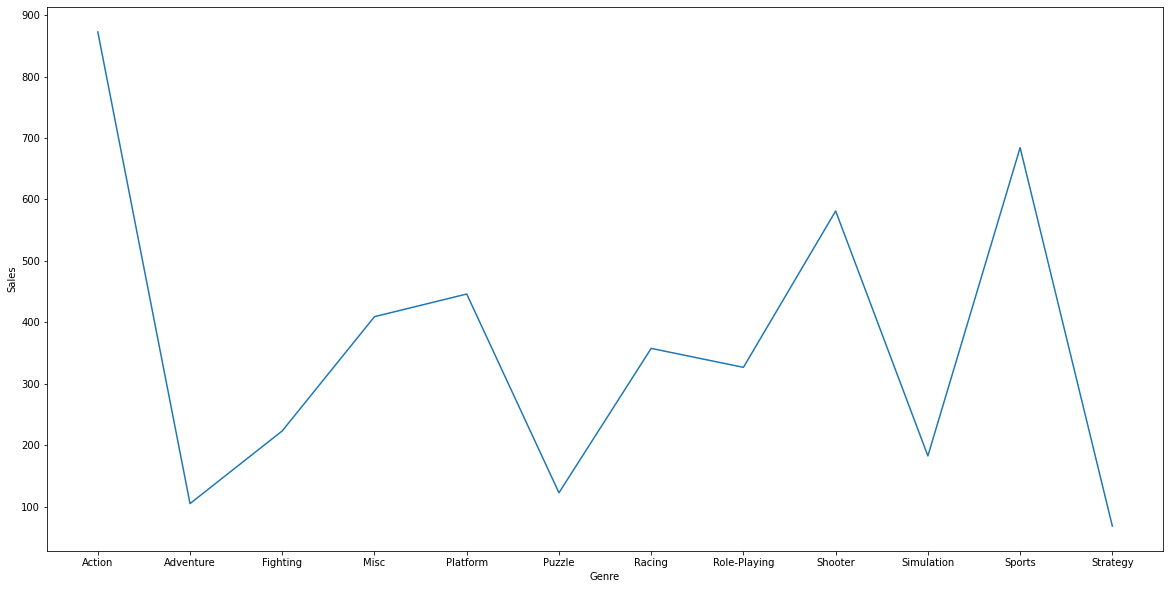

In [182]:
gf = (df_data_na['NA_Sales']).groupby(df_data_na['Genre']).sum().reset_index(name='NA_Sales')
fig = plt.figure(figsize=(20,10))
plt.plot(gf['Genre'], gf['NA_Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

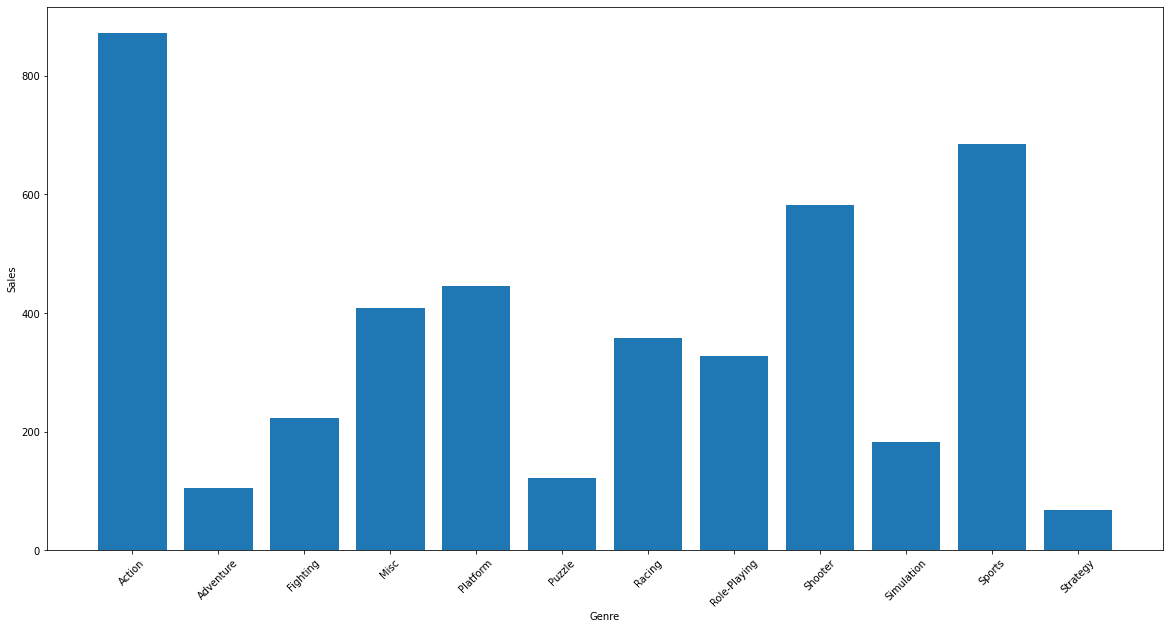

In [183]:
fig=plt.figure(figsize=(20,10))
plt.bar(gf['Genre'], gf['NA_Sales'], align='center')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

### Vendas na União Européia

In [184]:
df_data_eu=df_data.drop(columns=['Rank',
       'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

df_data_eu

,Name,Platform,Year,Genre,Publisher,EU_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.58
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,8.89
...,...,...,...,...,...,...
14093,Castlevania Bloodlines,GEN,1994.0,Platform,Konami Digital Entertainment,0.00
14094,Hakuouki: Zuisouroku DS,DS,2011.0,Adventure,Idea Factory,0.00
14095,Might & Magic X: Legacy,PC,2014.0,Role-Playing,Ubisoft,0.03
14096,Detective Conan: Prelude from the Past,PSP,2012.0,Action,Namco Bandai Games,0.00


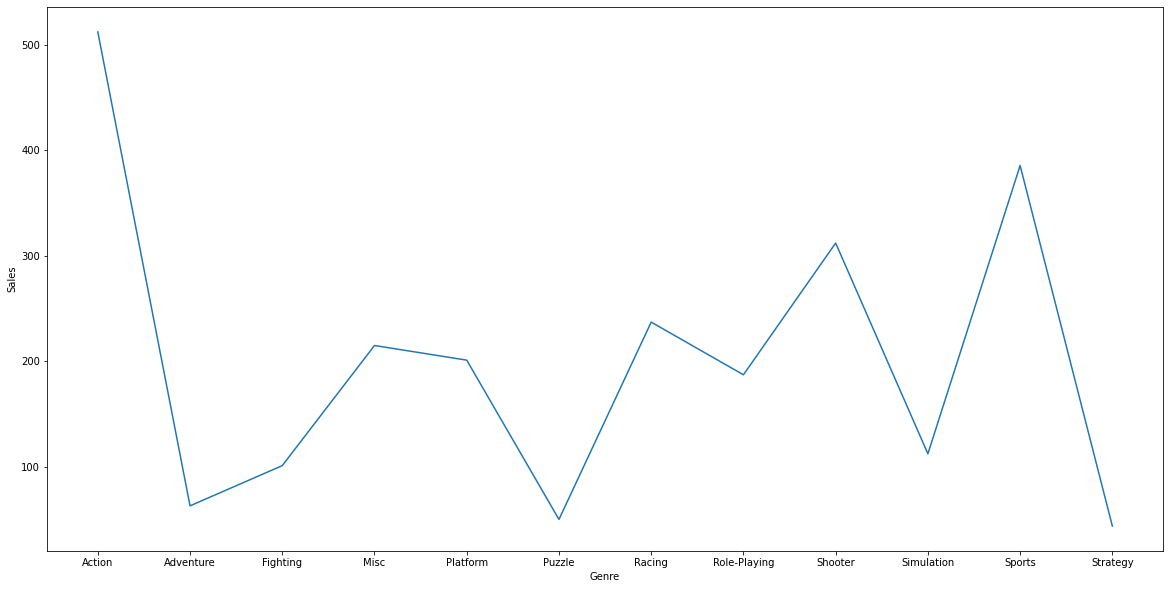

In [185]:
gf_eu = (df_data_eu['EU_Sales']).groupby(df_data_eu['Genre']).sum().reset_index(name='EU_Sales')
fig = plt.figure(figsize=(20,10))
plt.plot(gf_eu['Genre'], gf_eu['EU_Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

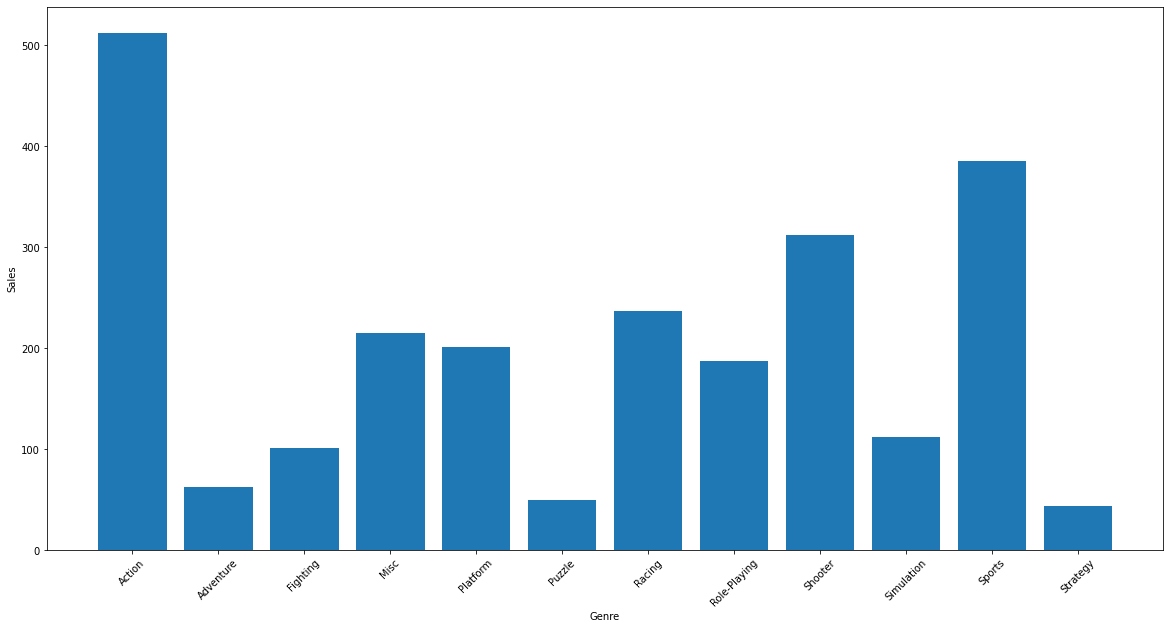

In [186]:
fig=plt.figure(figsize=(20,10))
plt.bar(gf_eu['Genre'], gf_eu['EU_Sales'], align='center')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

### Vendas no Japão

In [187]:
df_data_jp=df_data.drop(columns=['Rank',
       'NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'])

df_data_jp

,Name,Platform,Year,Genre,Publisher,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
...,...,...,...,...,...,...
14093,Castlevania Bloodlines,GEN,1994.0,Platform,Konami Digital Entertainment,0.04
14094,Hakuouki: Zuisouroku DS,DS,2011.0,Adventure,Idea Factory,0.04
14095,Might & Magic X: Legacy,PC,2014.0,Role-Playing,Ubisoft,0.00
14096,Detective Conan: Prelude from the Past,PSP,2012.0,Action,Namco Bandai Games,0.04


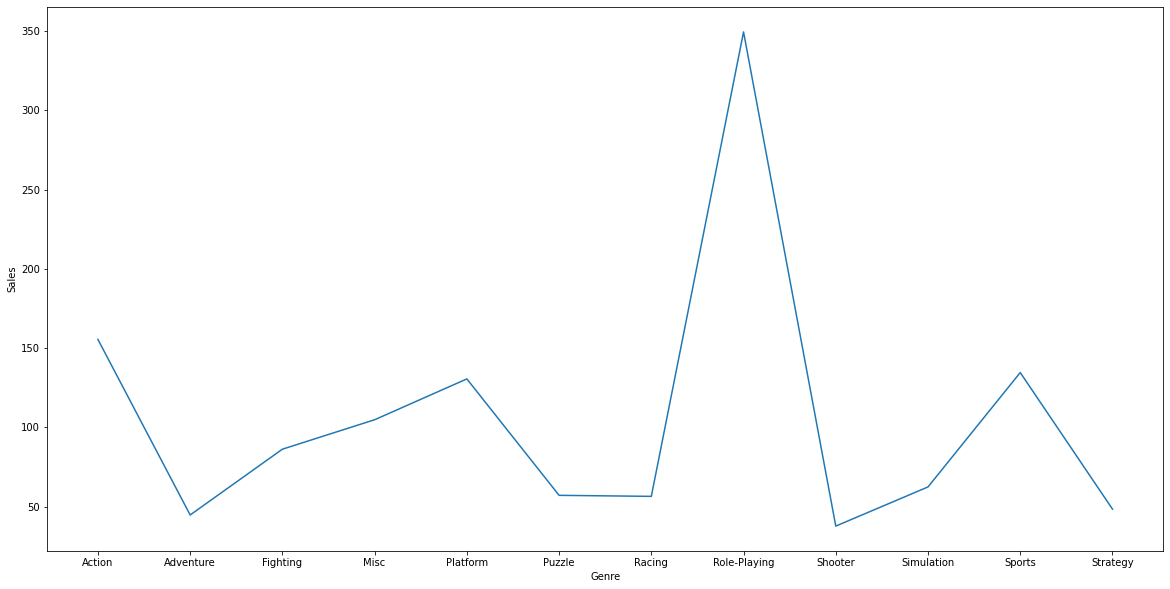

In [188]:
gf_jp = (df_data_jp['JP_Sales']).groupby(df_data_jp['Genre']).sum().reset_index(name='JP_Sales')
fig = plt.figure(figsize=(20,10))
plt.plot(gf_jp['Genre'], gf_jp['JP_Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

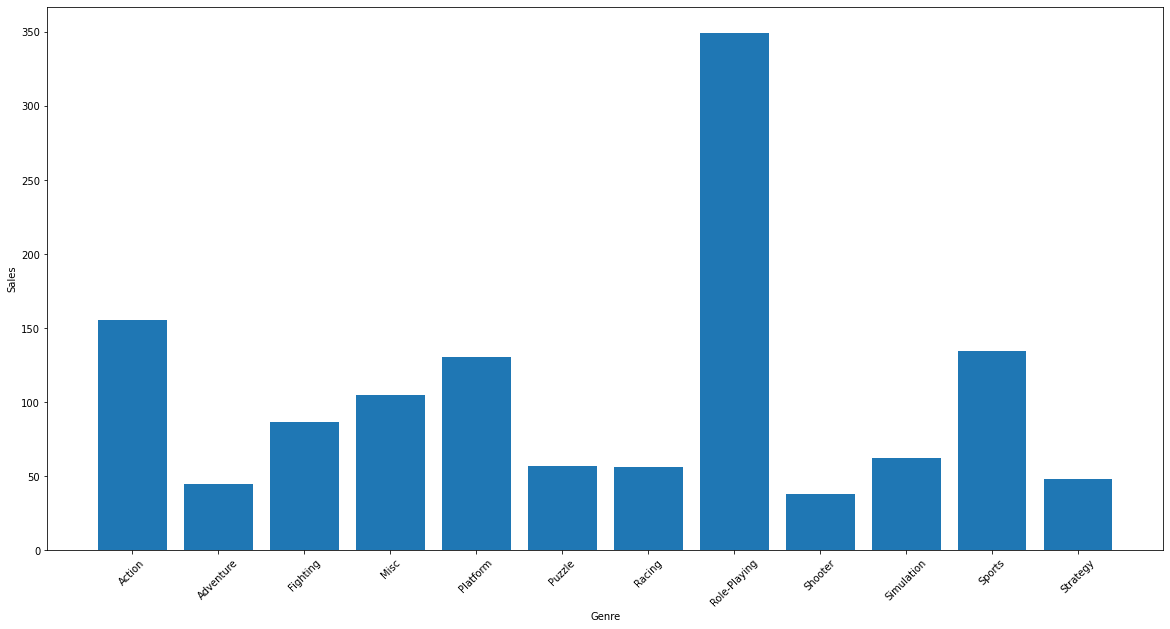

In [189]:
fig=plt.figure(figsize=(20,10))
plt.bar(gf_jp['Genre'], gf_jp['JP_Sales'], align='center')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

### Comparando os três continentes

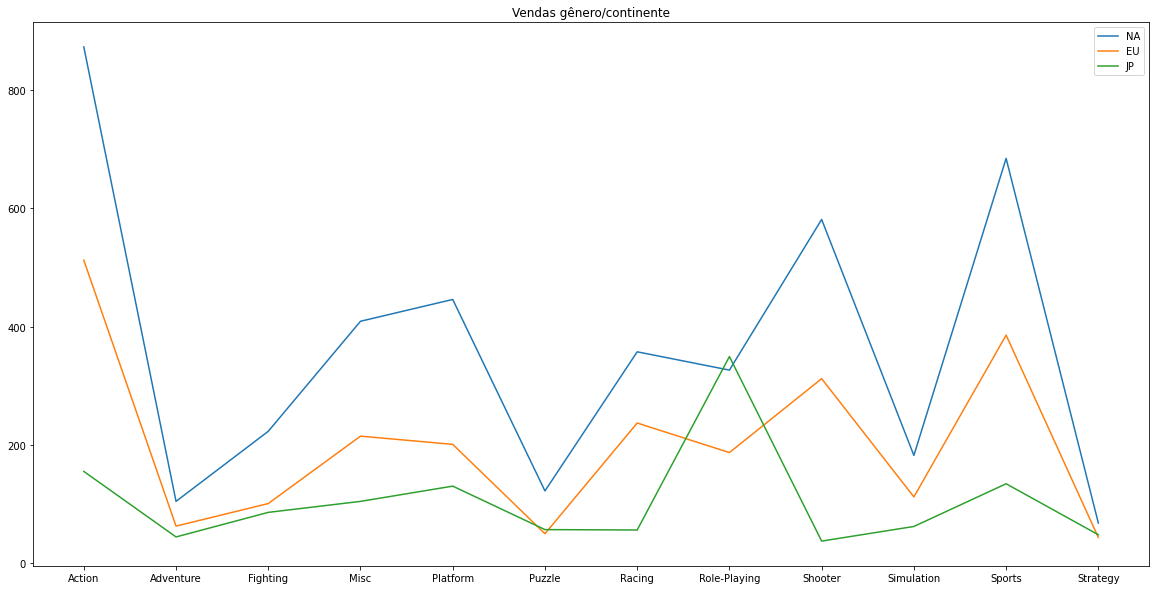

In [190]:
x = gf['Genre']
y = gf['NA_Sales']
z = gf_eu['EU_Sales']
k = gf_jp['JP_Sales']
fig = plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, k)
plt.title('Vendas gênero/continente')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

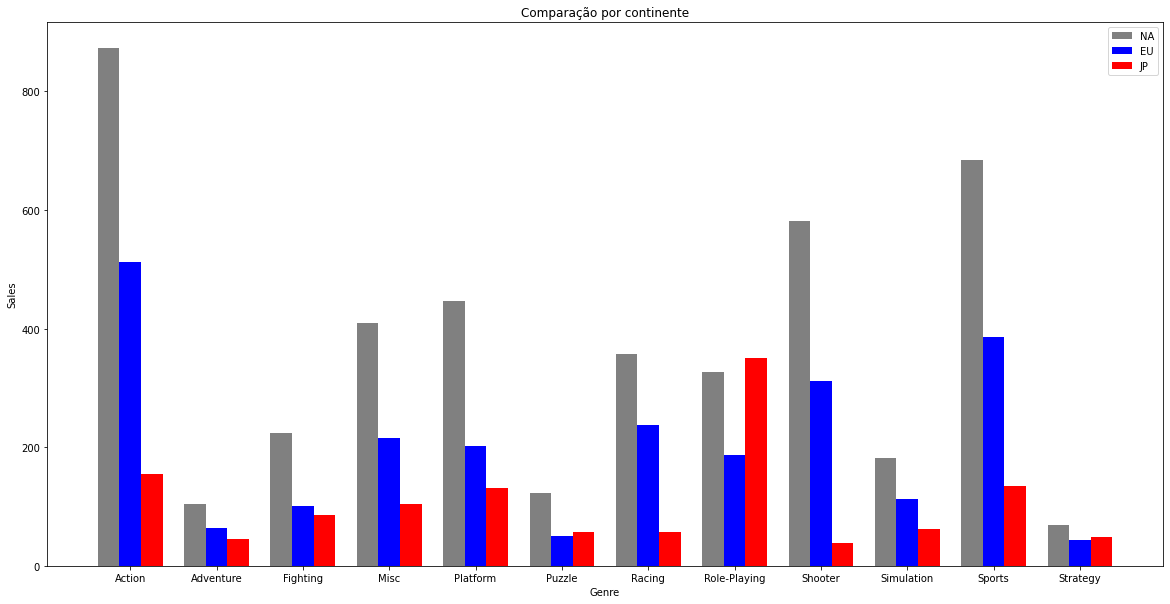

In [191]:
fig = plt.figure(figsize=(20,10))

x_values1 = [0.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5,22.5]
x_values2 = [1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0]
x_values3 = [1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5,19.5,21.5,23.5]
width=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# Subplot configuration:
ax = plt.subplot()
ax.set_xticks(range(1,30,2))

ax.set_xticklabels(gf['Genre'])

plt.bar(x_values1, gf['NA_Sales'], color='grey', width=width)
plt.bar(x_values2, gf_eu['EU_Sales'], color='blue', width=width)
plt.bar(x_values3, gf_jp['JP_Sales'], color='red', width=width)
# Display plot:
plt.title("Comparação por continente")
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.legend(['NA', 'EU', 'JP'])
plt.show()

## Vendas para um gênero

### Vendas por jogo de ação

In [192]:
df_data_c0

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
14082,14084,Hitman: Blood Money,PC,2006.0,Action,Eidos Interactive,0.00,0.03,0.00,0.01,0.04
14083,14085,Assassin's Creed Chronicles: China,PS4,2015.0,Action,Ubisoft,0.00,0.03,0.00,0.01,0.04
14084,14086,The Cursed Crusade,PC,2011.0,Action,DTP Entertainment,0.00,0.03,0.00,0.01,0.04
14087,14089,Housekeeping,DS,NaN,Action,NaN,0.00,0.00,0.04,0.00,0.04


In [193]:
groupbygame = (df_data_c0['Global_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='Global_Sales')
groupbygame_na = (df_data_c0['NA_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='NA_Sales')
groupbygame_jp = (df_data_c0['JP_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='JP_Sales')
groupbygame_eu = (df_data_c0['EU_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='EU_Sales')

groupbygame

,Name,Global_Sales
0,007: Quantum of Solace,3.89
1,007: The World is not Enough,2.47
2,1001 Touch Games,0.33
3,2 Games in 1 Double Pack: The Incredibles / Fi...,1.76
4,2 Games in 1: Disney's Brother Bear / The Lion...,0.31
...,...,...
1606,[Prototype 2],1.65
1607,[Prototype],2.55
1608,inFAMOUS,2.94
1609,inFAMOUS 2,1.85


In [194]:
# getting top 10 per continent
top10_global = groupbygame.nlargest(10, 'Global_Sales')
top10_na = groupbygame_na.nlargest(10, 'NA_Sales')
top10_jp = groupbygame_jp.nlargest(10, 'JP_Sales')
top10_eu = groupbygame_eu.nlargest(10, 'EU_Sales')

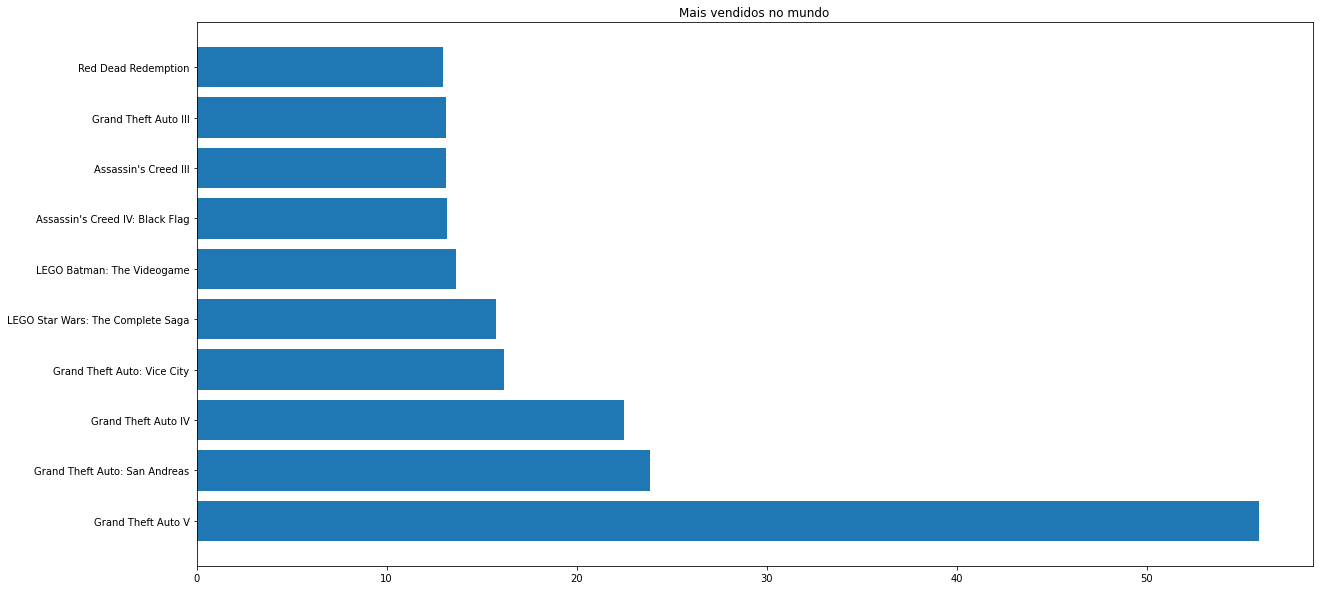

In [195]:
x = top10_global['Name']
y = top10_global['Global_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no mundo')
plt.show()

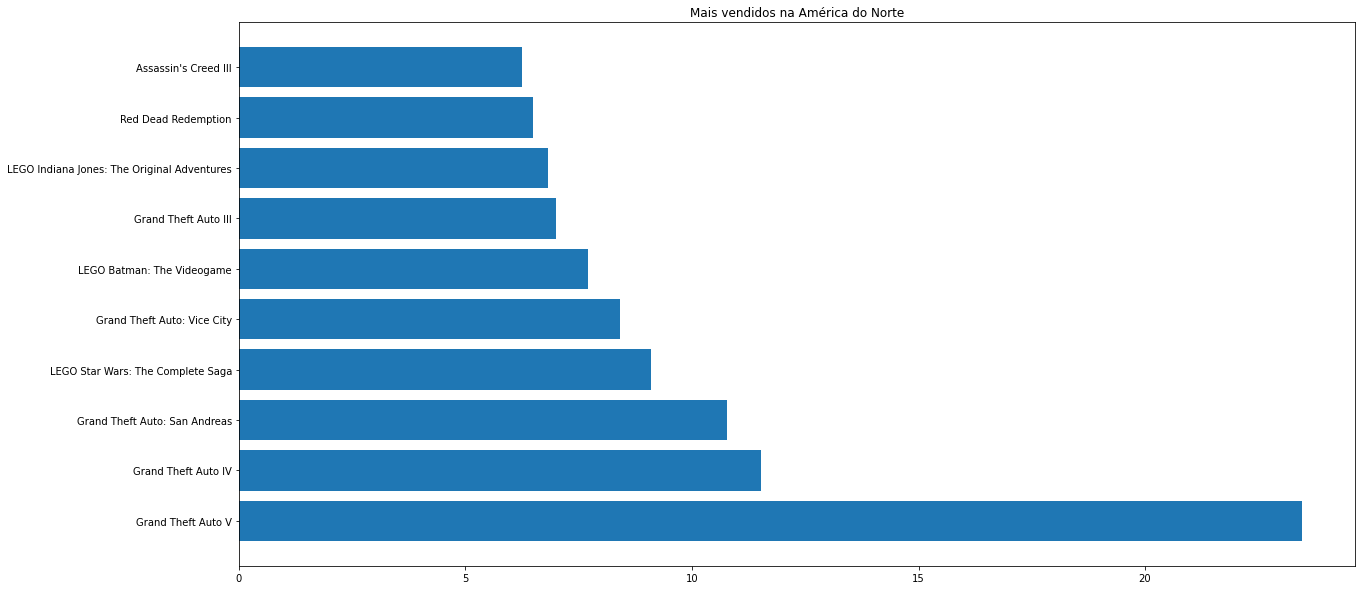

In [196]:
x = top10_na['Name']
y = top10_na['NA_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na América do Norte')
plt.show()

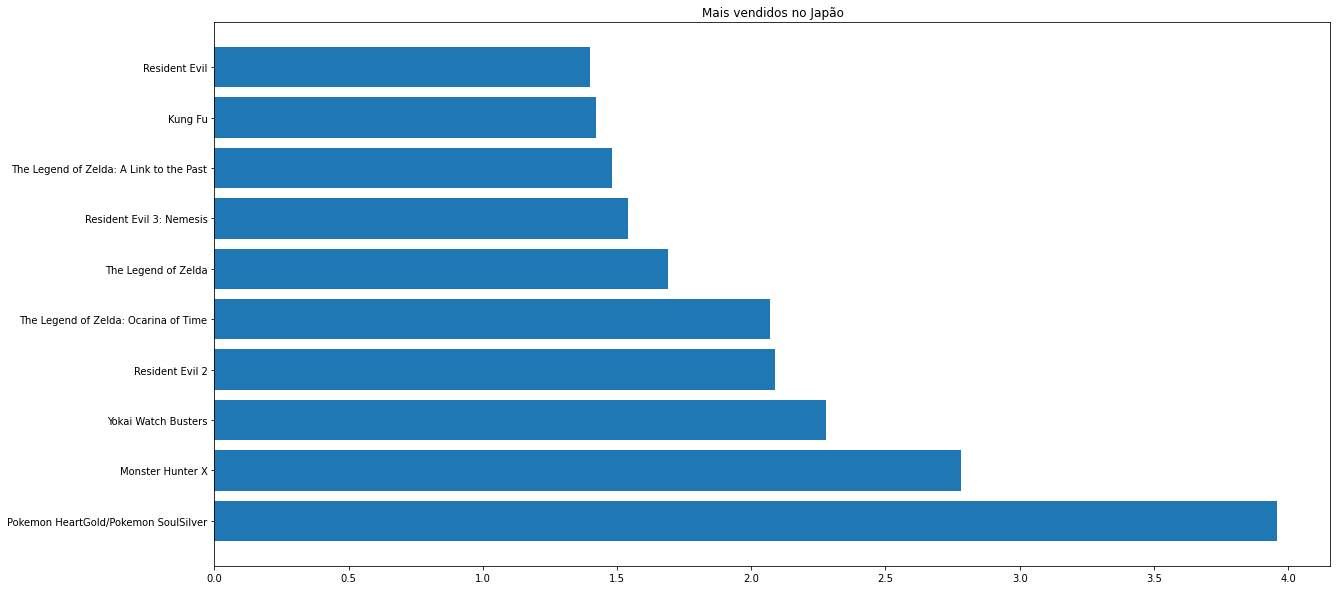

In [197]:
x = top10_jp['Name']
y = top10_jp['JP_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no Japão')
plt.show()

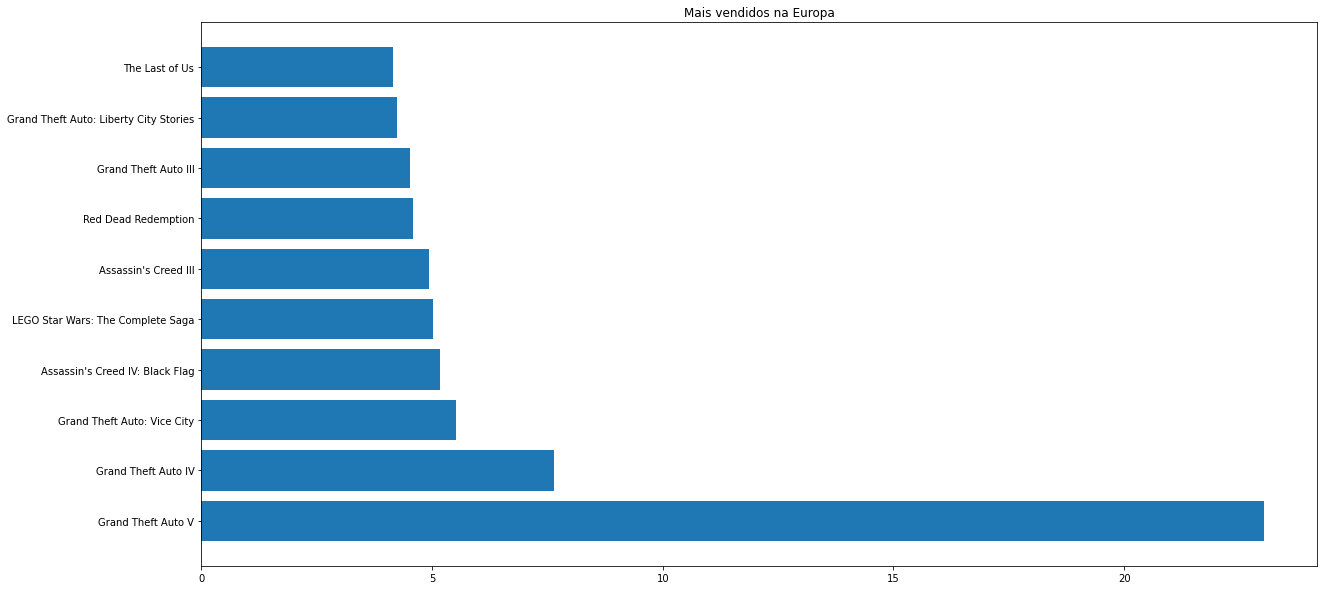

In [198]:
x = top10_eu['Name']
y = top10_eu['EU_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na Europa')
plt.show()

### Vendas por jogo de esporte

In [199]:
df_data_c1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
14031,14033,Stadium Games,GBA,2003.0,Sports,Ignition Entertainment,0.03,0.01,0.00,0.00,0.04
14033,14035,Power Play Pool,DS,2006.0,Sports,System 3 Arcade Software,0.03,0.00,0.00,0.00,0.04
14034,14036,J-League Pro Striker 2,GEN,1994.0,Sports,Sega,0.00,0.00,0.04,0.00,0.04
14047,14049,Winter Sports 3: The Great Tournament,PS3,2010.0,Sports,Tradewest,0.00,0.03,0.00,0.01,0.04


In [200]:
groupbygame = (df_data_c1['Global_Sales']).groupby(df_data_c1['Name']).sum().reset_index(name='Global_Sales')
groupbygame_na = (df_data_c1['NA_Sales']).groupby(df_data_c1['Name']).sum().reset_index(name='NA_Sales')
groupbygame_jp = (df_data_c1['JP_Sales']).groupby(df_data_c1['Name']).sum().reset_index(name='JP_Sales')
groupbygame_eu = (df_data_c1['EU_Sales']).groupby(df_data_c1['Name']).sum().reset_index(name='EU_Sales')

groupbygame

,Name,Global_Sales
0,'98 Koshien,0.41
1,10 Minute Solution,0.08
2,101-in-1 Sports Megamix,0.08
3,1080°: TenEighty Snowboarding,2.03
4,2002 FIFA World Cup,0.83
...,...,...
1266,Zero4 Champ RR,0.36
1267,Zumba Fitness,9.79
1268,Zumba Fitness 2,2.88
1269,Zumba Fitness Rush,0.19


In [201]:
# getting top 10 per continent
top10_global = groupbygame.nlargest(10, 'Global_Sales')
top10_na = groupbygame_na.nlargest(10, 'NA_Sales')
top10_jp = groupbygame_jp.nlargest(10, 'JP_Sales')
top10_eu = groupbygame_eu.nlargest(10, 'EU_Sales')

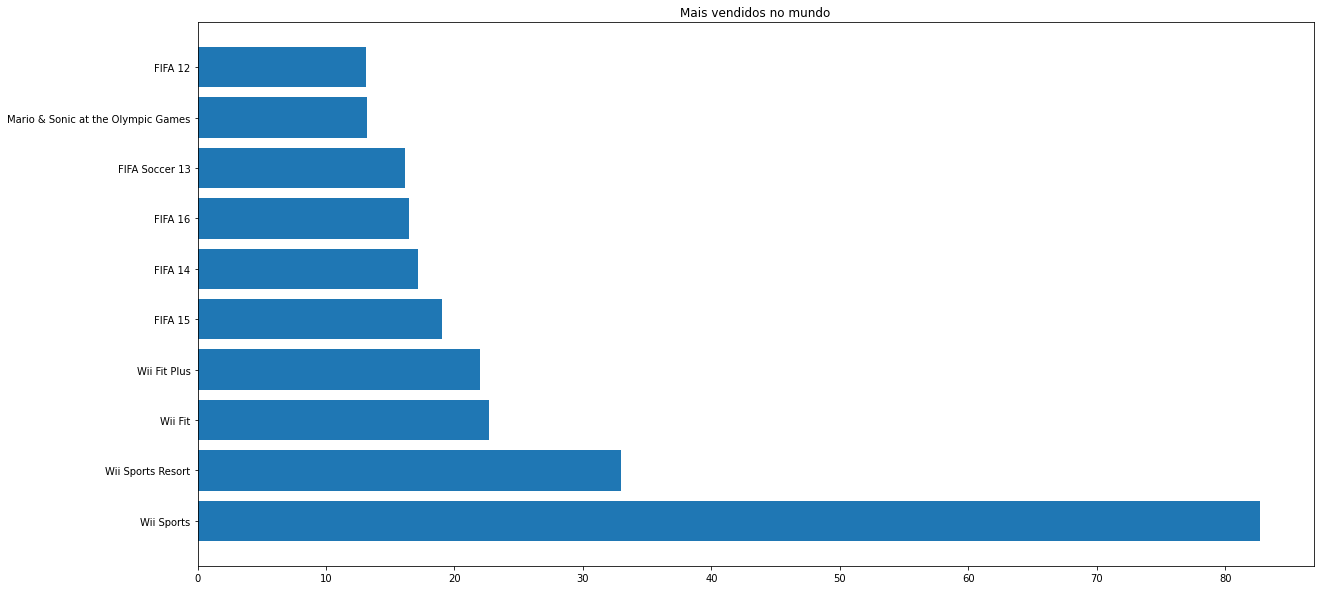

In [202]:
x = top10_global['Name']
y = top10_global['Global_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no mundo')
plt.show()

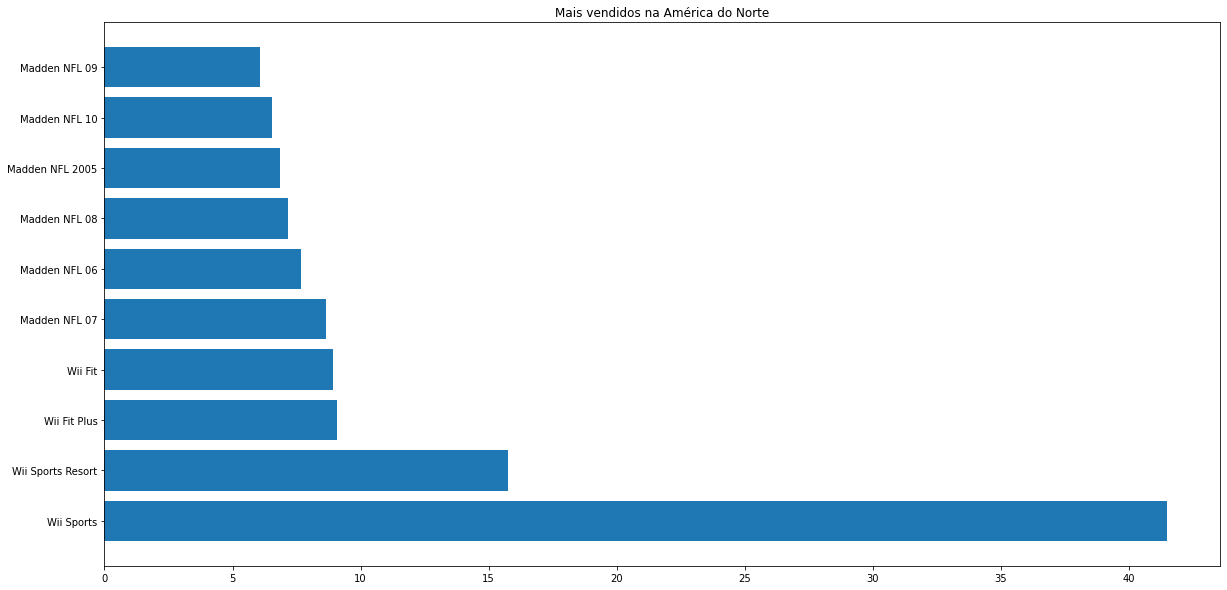

In [203]:
x = top10_na['Name']
y = top10_na['NA_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na América do Norte')
plt.show()

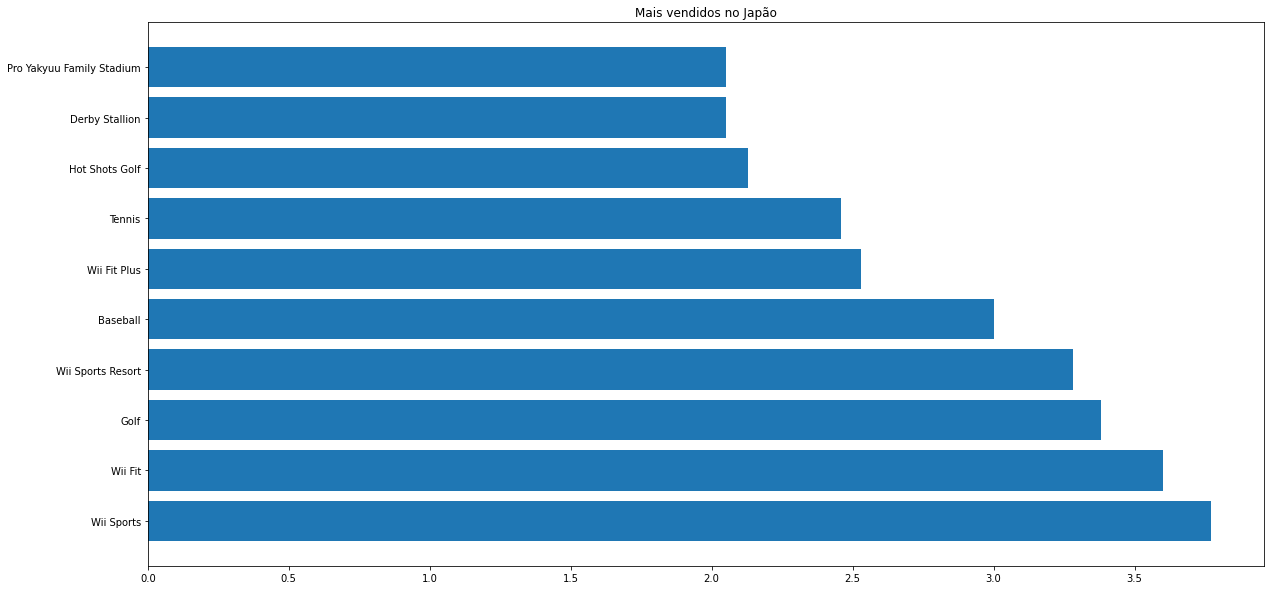

In [204]:
x = top10_jp['Name']
y = top10_jp['JP_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no Japão')
plt.show()

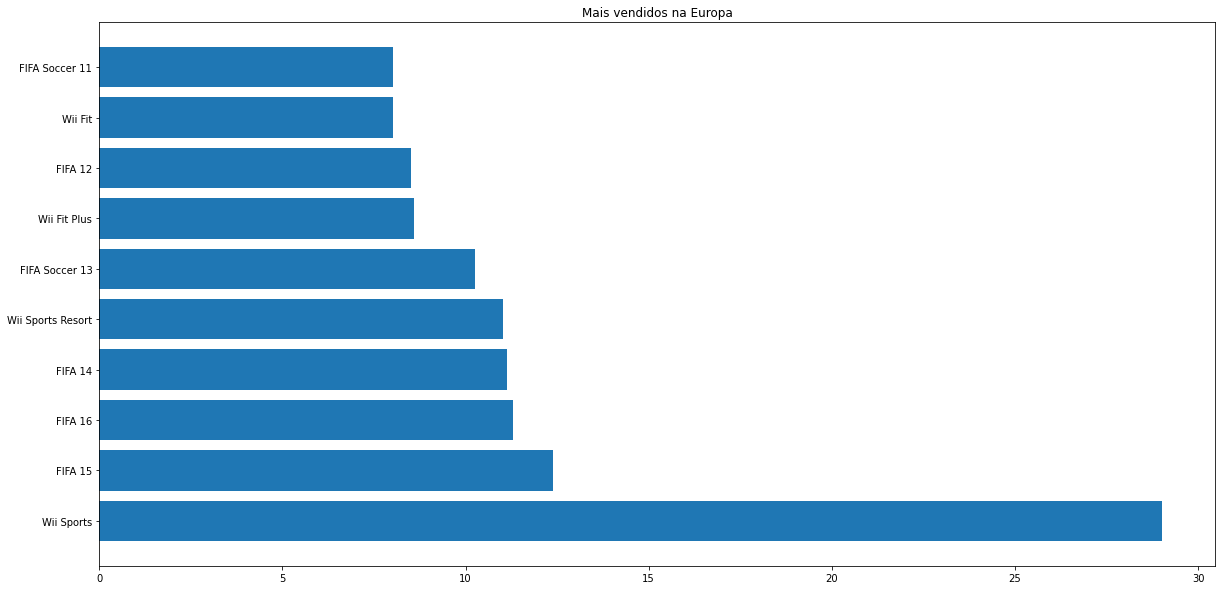

In [205]:
x = top10_eu['Name']
y = top10_eu['EU_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na Europa')
plt.show()

### Vendas por jogo de role-playing

In [206]:
df_data_c2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
...,...,...,...,...,...,...,...,...,...,...,...
14071,14073,Planescape: Torment,PC,1998.0,Role-Playing,Interplay,0.01,0.02,0.00,0.01,0.04
14072,14074,Tao Adventure: Curse Demon,DS,2005.0,Role-Playing,Konami Digital Entertainment,0.03,0.00,0.00,0.00,0.04
14079,14081,Black Stone: Magic & Steel,XB,2003.0,Role-Playing,THQ,0.03,0.01,0.00,0.00,0.04
14095,14097,Might & Magic X: Legacy,PC,2014.0,Role-Playing,Ubisoft,0.00,0.03,0.00,0.00,0.04


In [207]:
groupbygame = (df_data_c2['Global_Sales']).groupby(df_data_c2['Name']).sum().reset_index(name='Global_Sales')
groupbygame_na = (df_data_c2['NA_Sales']).groupby(df_data_c2['Name']).sum().reset_index(name='NA_Sales')
groupbygame_jp = (df_data_c2['JP_Sales']).groupby(df_data_c2['Name']).sum().reset_index(name='JP_Sales')
groupbygame_eu = (df_data_c2['EU_Sales']).groupby(df_data_c2['Name']).sum().reset_index(name='EU_Sales')

groupbygame

,Name,Global_Sales
0,.hack//G.U. Vol.1//Rebirth,0.17
1,.hack//G.U. Vol.2//Reminisce,0.23
2,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
3,.hack//G.U. Vol.3//Redemption,0.17
4,.hack//Infection Part 1,1.27
...,...,...
1044,Zetta Hero Project: Unlosing Ranger vs. Darkde...,0.14
1045,Zettai Onkan Otoda Master,0.07
1046,Zill O'll Infinite Plus,0.06
1047,Zoids: Legacy,0.08


In [208]:
# getting top 10 per continent
top10_global = groupbygame.nlargest(10, 'Global_Sales')
top10_na = groupbygame_na.nlargest(10, 'NA_Sales')
top10_jp = groupbygame_jp.nlargest(10, 'JP_Sales')
top10_eu = groupbygame_eu.nlargest(10, 'EU_Sales')

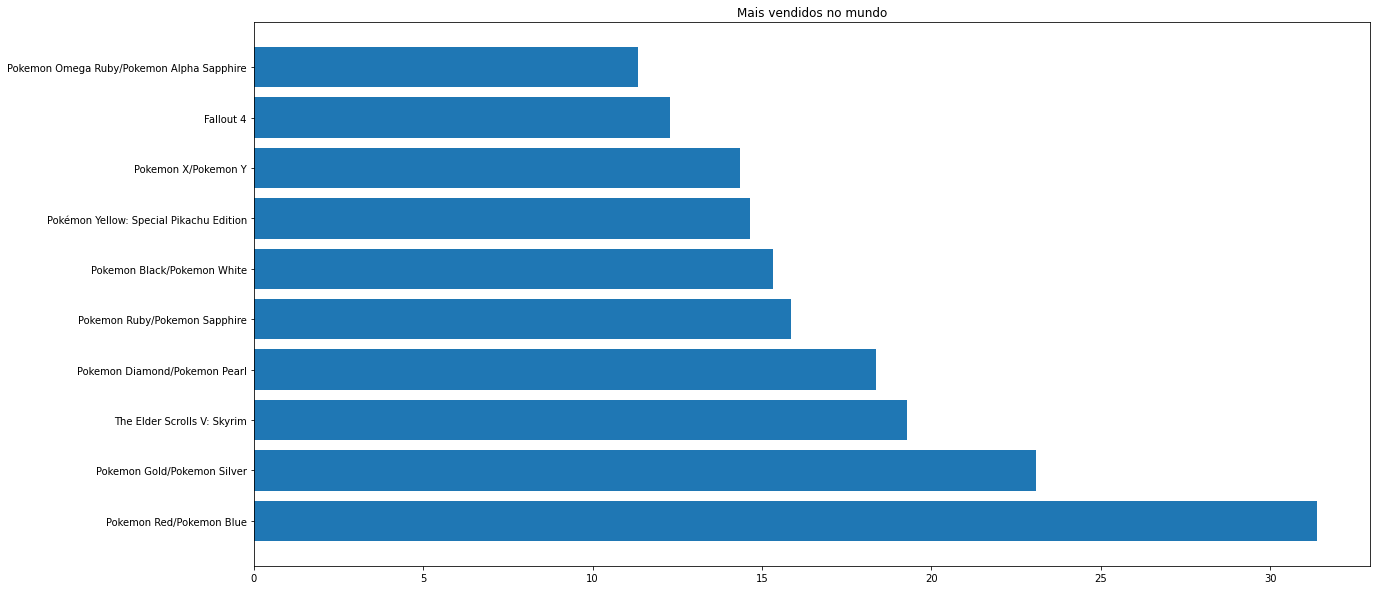

In [209]:
x = top10_global['Name']
y = top10_global['Global_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no mundo')
plt.show()

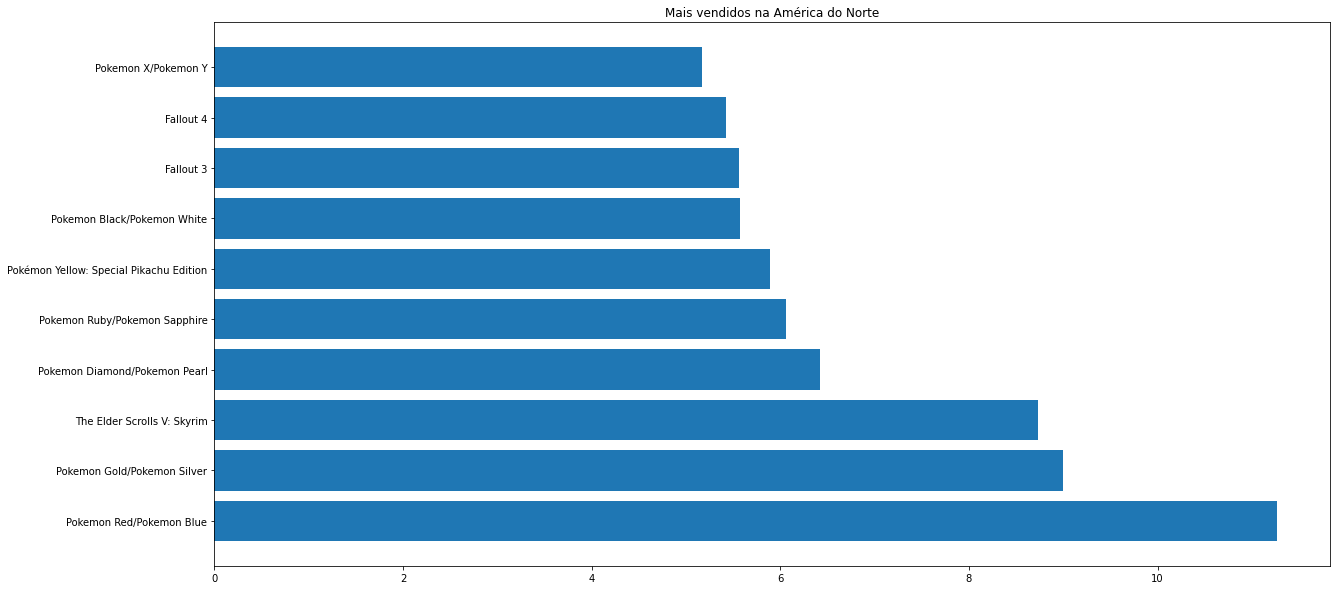

In [210]:
x = top10_na['Name']
y = top10_na['NA_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na América do Norte')
plt.show()

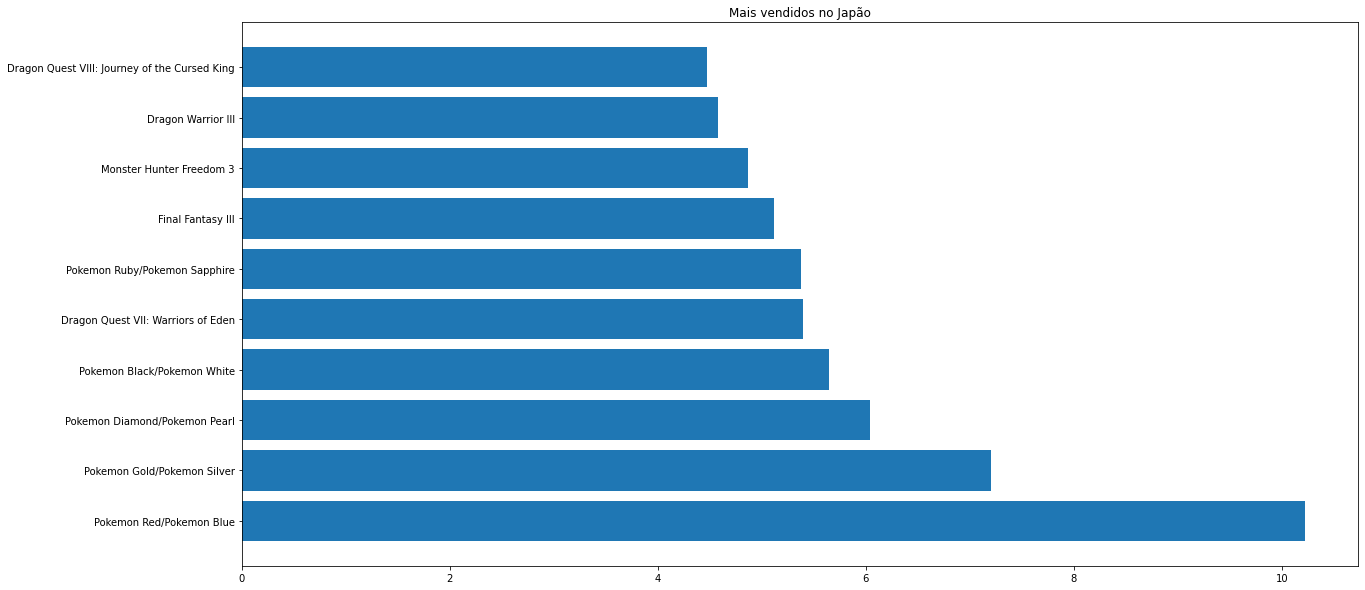

In [211]:
x = top10_jp['Name']
y = top10_jp['JP_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no Japão')
plt.show()

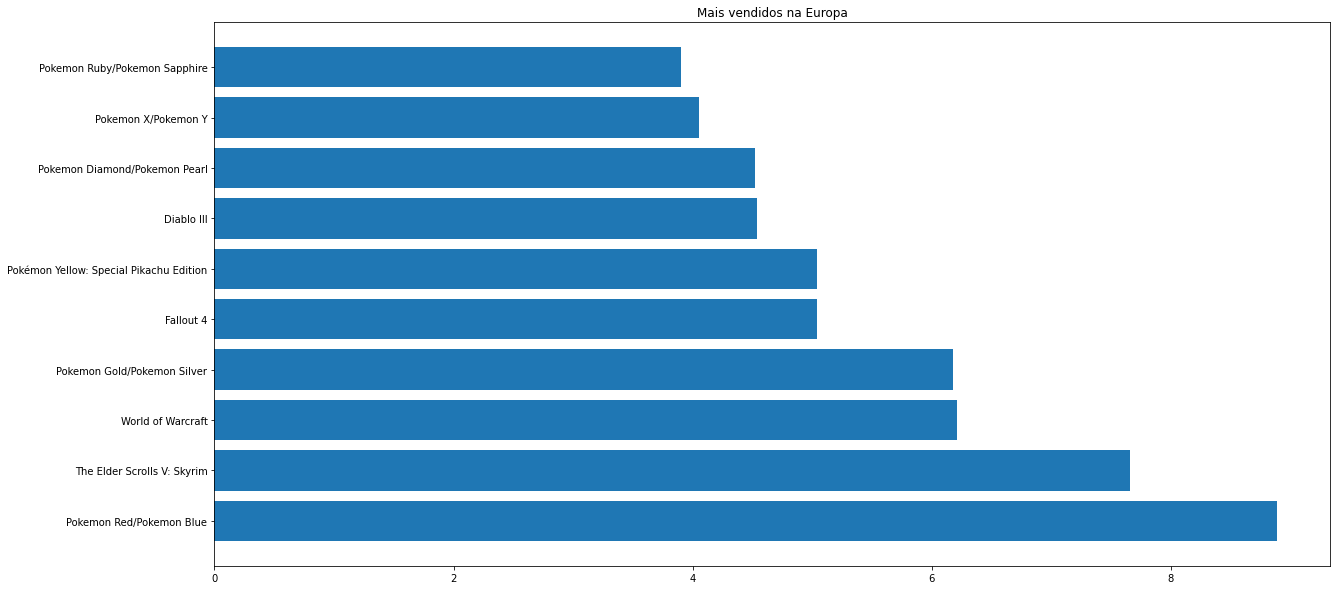

In [212]:
x = top10_eu['Name']
y = top10_eu['EU_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na Europa')
plt.show()